# Notebook for visualization

Text(0, 0.5, 'Density')

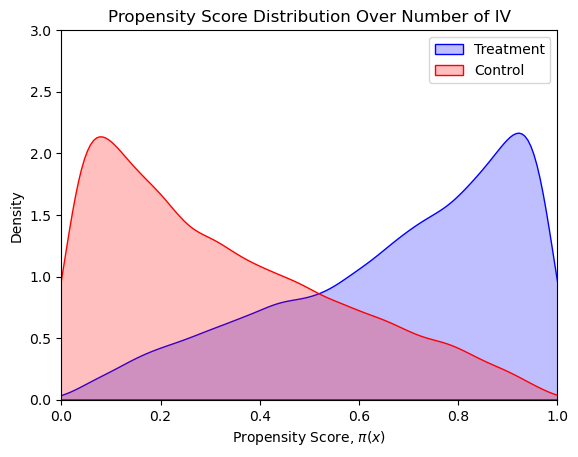

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import HTML
from data import *
import warnings
import os

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
def plot_true_w_hat_w_tilde(df, true_w_tilde_values, hat_w_tilde_values, ):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['tilde_y'], true_w_values, label='True w_tilde', alpha=0.7)
    plt.scatter(df['tilde_y'], hat_w_tilde_values, label='Estimated hat_w_tilde', alpha=0.7)
    plt.xlabel('tilde_y')
    plt.ylabel('w_tilde values')
    plt.title('True w_tilde and Estimated hat_w_tilde vs tilde_y')
    plt.legend()
    plt.show()

np.random.seed(42)

# Simulate propensity scores for two treatment groups
n_samples = 3000
p_instr = 11


# Initialize the plot
fig, ax = plt.subplots()

# Set axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 3)
ax.set_title('Propensity Score Distribution Over Number of IV')
ax.set_xlabel(r'Propensity Score, $\pi(x)$')
ax.set_ylabel('Density')

# Generate initial propensity scores
df = generate_synthetic_data(n=n_samples*10, p=10, p_instr=5, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')

group_1_propensity_scores = df[df['A'] == 1]['propen']
group_0_propensity_scores = df[df['A'] == 0]['propen']
# Update propensity scores


# Plot updated distributions using seaborn's KDE
sns.kdeplot(group_1_propensity_scores, ax=ax, label='Treatment', color='blue', fill=True)
sns.kdeplot(group_0_propensity_scores, ax=ax, label='Control', color='red', fill=True)

# Add legend and title with the current time step
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 3)
ax.set_xlabel(r'Propensity Score, $\pi(x)$')
ax.set_ylabel('Density')



# normal case

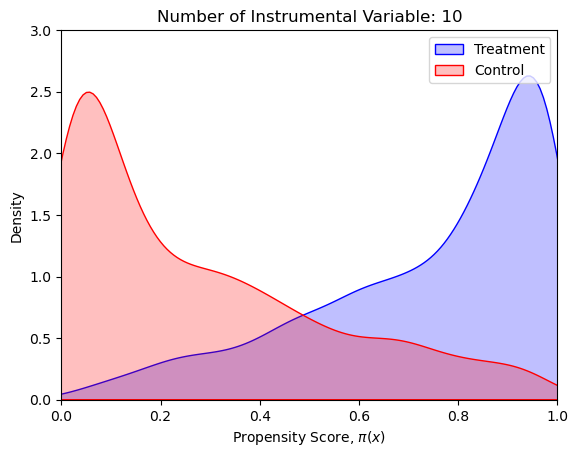

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import HTML
from data import *
import warnings
import os

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Generate synthetic data for illustration
np.random.seed(42)

# Simulate propensity scores for two treatment groups
n_samples = 3000
p_instr = 11

# Generate initial propensity scores
df = generate_synthetic_data(n=n_samples, p=5, p_instr=0, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')

group_1_propensity_scores = df[df['A'] == 1]['propen']
group_0_propensity_scores = df[df['A'] == 0]['propen']

# Function to simulate changing distribution of propensity scores over time
def update_propensity_scores(p_ins):
    # Change propensity score distribution by shifting the mean or scale
    df = generate_synthetic_data(n=n_samples, p=5 + p_ins, p_instr=p_ins, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')
    group_1_propensity_scores = df[df['A'] == 1]['propen']
    group_0_propensity_scores = df[df['A'] == 0]['propen']
    return group_1_propensity_scores, group_0_propensity_scores

# Initialize the plot
fig, ax = plt.subplots()

# Set axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 3)
ax.set_title('Propensity Score Distribution Over Number of IV')
ax.set_xlabel(r'Propensity Score, $\pi(x)$')
ax.set_ylabel('Density')

# Function to update the plot for each time step
def update(frame):
    if frame >= 11:  # If in the pause "frames", don't generate new plots
        return

    ax.clear()
    # Update propensity scores
    updated_group_1, updated_group_0 = update_propensity_scores(frame)

    # Plot updated distributions using seaborn's KDE
    sns.kdeplot(updated_group_1, ax=ax, label='Treatment', color='blue', fill=True)
    sns.kdeplot(updated_group_0, ax=ax, label='Control', color='red', fill=True)

    # Add legend and title with the current time step
    ax.legend()
    ax.set_title(f'Number of Instrumental Variable: {frame}')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 3)
    ax.set_xlabel(r'Propensity Score, $\pi(x)$')
    ax.set_ylabel('Density')

# Create the animation
ani = FuncAnimation(fig, update, frames=list(range(p_instr)) + [p_instr] * 10, interval=400, repeat=True)

# To save the animation as a file (e.g., mp4 or gif)
# ani.save('propensity_score_animation.mp4', writer='ffmpeg')

# Show the animation in Jupyter
display(HTML(ani.to_jshtml())) 

# Save the animation as a GIF (optional)
save_path = os.path.join('../../paper_vis/', 'propensity_score_density.gif')
ani.save(save_path, writer='pillow')

# Define the frames you want to save as PNG (e.g., frames 1, 5, and 10)
frames_to_save = [1, 5, 10]

# Loop through the specified frames
for frame in frames_to_save:
    # Call the update function for each frame
    update(frame)
    
    # Save the current frame as a PNG file
    save_frame_path = os.path.join('../../paper_vis/', f'propensity_score_frame_{frame}.png')
    plt.savefig(save_frame_path)

# extreme case

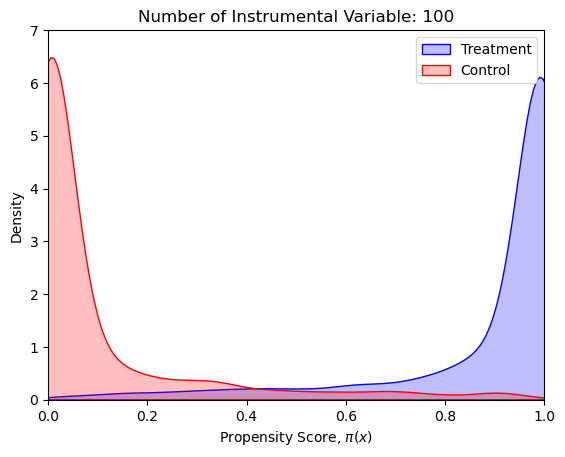

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import HTML
from data import *
import warnings
import os

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Generate synthetic data for illustration
np.random.seed(42)

# Simulate propensity scores for two treatment groups
n_samples = 3000
p_instr = 11

# Generate initial propensity scores
df = generate_synthetic_data(n=n_samples, p=5, p_instr=0, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')

group_1_propensity_scores = df[df['A'] == 1]['propen']
group_0_propensity_scores = df[df['A'] == 0]['propen']

# Function to simulate changing distribution of propensity scores over time
def update_propensity_scores(p_ins):
    # Change propensity score distribution by shifting the mean or scale
    df = generate_synthetic_data(n=n_samples, p=5 + p_ins*10, p_instr=p_ins*10, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')
    group_1_propensity_scores = df[df['A'] == 1]['propen']
    group_0_propensity_scores = df[df['A'] == 0]['propen']
    return group_1_propensity_scores, group_0_propensity_scores

# Initialize the plot
fig, ax = plt.subplots()

# Set axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 7)
ax.set_title('Propensity Score Distribution Over Number of IV')
ax.set_xlabel(r'Propensity Score, $\pi(x)$')
ax.set_ylabel('Density')

# Function to update the plot for each time step
def update(frame):
    if frame >= 11:  # If in the pause "frames", don't generate new plots
        return

    ax.clear()
    # Update propensity scores
    updated_group_1, updated_group_0 = update_propensity_scores(frame)

    # Plot updated distributions using seaborn's KDE
    sns.kdeplot(updated_group_1, ax=ax, label='Treatment', color='blue', fill=True)
    sns.kdeplot(updated_group_0, ax=ax, label='Control', color='red', fill=True)

    # Add legend and title with the current time step
    ax.legend()
    ax.set_title(f'Number of Instrumental Variable: {frame*10}')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 7)
    ax.set_xlabel(r'Propensity Score, $\pi(x)$')
    ax.set_ylabel('Density')

# Create the animation
ani = FuncAnimation(fig, update, frames=list(range(p_instr)) + [p_instr] * 10, interval=400, repeat=True)

# To save the animation as a file (e.g., mp4 or gif)
# ani.save('propensity_score_animation.mp4', writer='ffmpeg')

# Show the animation in Jupyter
display(HTML(ani.to_jshtml())) 

# Save the animation as a GIF (optional)
save_path = os.path.join('../../paper_vis/', 'propensity_score_density_extreme.gif')
ani.save(save_path, writer='pillow')

# Define the frames you want to save as PNG (e.g., frames 1, 5, and 10)
frames_to_save = [1, 5, 10]

# Loop through the specified frames
for frame in frames_to_save:
    # Call the update function for each frame
    update(frame)
    
    # Save the current frame as a PNG file
    save_frame_path = os.path.join('../../paper_vis/', f'propensity_score_frame_{frame*10}_extreme.png')
    plt.savefig(save_frame_path)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from data import *
import warnings
import os

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set random seed for reproducibility
np.random.seed(42)

# Simulate the initial dataset with propensity scores and instrumental variables
n_samples = 3000
p_instr = 11

# Function to generate and update the clever covariate variance (median, lower, and upper quantiles)
def update_var_clever_covariate(p_ins):
    var_clever_covariates = []
    # Generate synthetic data based on number of IVs
    for i in range(1000):  # 1000 simulations to estimate variance
        df = generate_synthetic_data(n=n_samples, p=5 + p_ins, p_instr=p_ins, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')
        var_clever_covariates.append(np.var((df['A'] - df['propen']) / (df['propen'] * (1 - df['propen']))))
    
    # Calculate median, lower (5%) and upper (95%) quantiles
    median_var = np.median(var_clever_covariates)
    lower_bound = np.quantile(var_clever_covariates, 0.05)
    upper_bound = np.quantile(var_clever_covariates, 0.95)
    
    return median_var, lower_bound, upper_bound

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set fixed axis limits and labels
ax.set_xlim(0, 10)  # Fixed number of IVs (0 to 10)
ax.set_ylim(0, 100)  # Fixed y-axis for variance (adjust as necessary)
ax.set_title('Variance of $H(A,X)$ Over Number of IV')
ax.set_xlabel('Number of IV')
ax.set_ylabel('Variance')

# Variables to store the median and quantiles over time
median_list = []
lower_bound_list = []
upper_bound_list = []
x_vals = []

# Line object for the median variance
median_line, = ax.plot([], [], color="blue", lw=2, label="Median Variance of $H(A,X)$")

# Initialize fill_between as a placeholder (it will be updated in the animation)
fill_between = ax.fill_between([], [], [], color="lightblue", alpha=0.3)

# Function to initialize the plot (for FuncAnimation)
def init():
    median_line.set_data([], [])
    return median_line, fill_between

# Function to update the plot for each time step
def update(frame):
    # Update variance for the current number of IVs (frame)
    median_var, lower_bound, upper_bound = update_var_clever_covariate(frame)
    
    # Append new values for median and quantiles
    x_vals.append(frame)
    median_list.append(median_var)
    lower_bound_list.append(lower_bound)
    upper_bound_list.append(upper_bound)
    
    # Update the median line with the new data
    median_line.set_data(x_vals, median_list)
    
    # Re-create the fill_between with updated quantile values (no need to remove it)
    fill_between = ax.fill_between(x_vals, lower_bound_list, upper_bound_list, color="lightblue", alpha=0.3)
    ax.set_xlim(0, 10)  # Fixed number of IVs (0 to 10)
    ax.set_ylim(0, 100)  # Fixed y-axis for variance (adjust as necessary)
    ax.set_title('Variance of $H(A,X)$ Over Number of IV')
    ax.set_xlabel('Number of IV')
    ax.set_ylabel('Variance')

    
    return median_line, fill_between

# Create the animation
ani = FuncAnimation(fig, update, frames=p_instr, init_func=init, interval=400, repeat=True)

# # Display the animation in Jupyter
# display(HTML(ani.to_jshtml()))

# Save the animation as a gif
save_path = os.path.join('../../paper_vis/', 'variance_over_IV_quantile_fill.gif')
ani.save(save_path, writer='pillow', dpi=80, savefig_kwargs={'facecolor':'white'})

# Close the figure after saving to prevent rendering issues
plt.close(fig)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from data import *
import warnings
import os

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set random seed for reproducibility
np.random.seed(2024)

# Simulate the initial dataset with propensity scores and instrumental variables
n_samples = 3000
p_instr = 11

# Function to generate and update the clever covariate variance (median, lower, and upper quantiles)
def update_var_clever_covariate(p_ins):
    var_clever_covariates = []
    # Generate synthetic data based on number of IVs
    for i in range(1000):  # 1000 simulations to estimate variance
        df = generate_synthetic_data(n=n_samples, p=5 + p_ins, p_instr=p_ins, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')
        var_clever_covariates.append(np.var((df['A'] - df['propen']) / (df['propen'] * (1 - df['propen']))))
    
    # Calculate median, lower (5%) and upper (95%) quantiles
    median_var = np.mean(var_clever_covariates)
    lower_bound = np.quantile(var_clever_covariates, 0.05)
    upper_bound = np.quantile(var_clever_covariates, 0.95)
    
    return median_var, lower_bound, upper_bound

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set fixed axis limits and labels
ax.set_xlim(0, 10)  # Fixed number of IVs (0 to 10)
ax.set_ylim(0, 100)  # Fixed y-axis for variance (adjust as necessary)
ax.set_title('Variance of $H(A,X)$ Over Number of IV')
ax.set_xlabel('Number of IV')
ax.set_ylabel('Variance')

# Variables to store the median and quantiles over time
median_list = []
lower_bound_list = []
upper_bound_list = []
x_vals = []

# Line object for the median variance
median_line, = ax.plot([], [], color="blue", lw=2, label="Median")

# Create an initial empty fill_between object (it will be updated in the animation)
fill_between = ax.fill_between([], [], [], color="lightblue", alpha=0.3, label="Quantile Range (5%-95%)")

# Function to initialize the plot (for FuncAnimation)
def init():
    median_line.set_data([], [])
    return median_line, fill_between

# Function to update the plot for each time step
def update(frame):
    global fill_between
    
    # Update variance for the current number of IVs (frame)
    median_var, lower_bound, upper_bound = update_var_clever_covariate(frame)
    
    # Append new values for median and quantiles
    x_vals.append(frame)
    median_list.append(median_var)
    lower_bound_list.append(lower_bound)
    upper_bound_list.append(upper_bound)
    
    # Update the median line with the new data
    median_line.set_data(x_vals, median_list)
    
    # Remove the previous fill_between and update the new one
    fill_between = ax.fill_between(x_vals, lower_bound_list, upper_bound_list, color="lightblue", alpha=0.3)
    
    # Add or update the legend
    ax.legend(loc='upper left')
    
    return median_line, fill_between

# Create the animation
ani = FuncAnimation(fig, update, frames=list(range(p_instr)) + [p_instr - 1]*10, init_func=init, interval=400, repeat=True)

# Save the animation as a gif with pillow
save_path = os.path.join('../../paper_vis/', 'variance_over_IV_quantile_fill.gif')
ani.save(save_path, writer='pillow', dpi=80, savefig_kwargs={'facecolor':'white'})

# Close the figure after saving to prevent rendering issues
plt.close(fig)


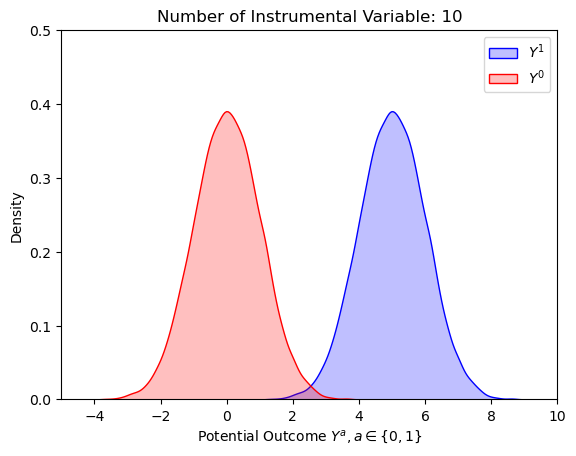

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import HTML
from data import *
import warnings
import os

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Generate synthetic data for illustration
np.random.seed(42)

# Simulate propensity scores for two treatment groups
n_samples = 30000
p_instr = 11

# Generate initial propensity scores
df = generate_synthetic_data(n=n_samples, p=5, p_instr=0, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')

group_1 = df['mu1']
group_0 = df['mu0']

# Function to simulate changing distribution of propensity scores over time
def update_potential_outcome(p_ins):
    # Change propensity score distribution by shifting the mean or scale
    #df = generate_synthetic_data(n=n_samples, p=5 + p_ins, p_instr=p_ins, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')
    X = np.random.normal(0, 1, n_samples)
    group_1 = X+5
    group_0 = X
    return group_1, group_0

# Initialize the plot
fig, ax = plt.subplots()

# Set axis limits and labels
ax.set_xlim(-5, 10)
ax.set_ylim(0, 0.5)
ax.set_title('Potential Outcome Distribution')
ax.set_xlabel(r'Potential Outcome $Y^a, a\in \{0,1\}$')
ax.set_ylabel('Density')

# Function to update the plot for each time step
def update(frame):
    if frame >= 11:  # If in the pause "frames", don't generate new plots
        return

    ax.clear()
    # Update propensity scores
    updated_group_1, updated_group_0 = update_potential_outcome(frame)

    # Plot updated distributions using seaborn's KDE
    sns.kdeplot(updated_group_1, ax=ax, label=r'$Y^1$', color='blue', fill=True)
    sns.kdeplot(updated_group_0, ax=ax, label=r'$Y^0$', color='red', fill=True)

    # Add legend and title with the current time step
    ax.legend()
    ax.set_title(f'Number of Instrumental Variable: {frame}')
    ax.set_xlim(-5, 10)
    ax.set_ylim(0, 0.5)
    ax.set_xlabel(r'Potential Outcome $Y^a, a\in \{0,1\}$')
    ax.set_ylabel('Density')

# Create the animation
ani = FuncAnimation(fig, update, frames=list(range(p_instr)) + [p_instr] * 10, interval=400, repeat=True)

# To save the animation as a file (e.g., mp4 or gif)
# ani.save('propensity_score_animation.mp4', writer='ffmpeg')

# Show the animation in Jupyter
display(HTML(ani.to_jshtml())) 

# Save the animation as a GIF (optional)
save_path = os.path.join('../../paper_vis/', 'potential_outcome_density.gif')
ani.save(save_path, writer='pillow')

frames_to_save = [1, 5, 10]
# Loop through the specified frames
for frame in frames_to_save:
    # Call the update function for each frame
    update(frame)
    
    # Save the current frame as a PNG file
    save_frame_path = os.path.join('../../paper_vis/', f'potential_outcome_density_frame_{frame}.png')
    plt.savefig(save_frame_path)

# Extreme case

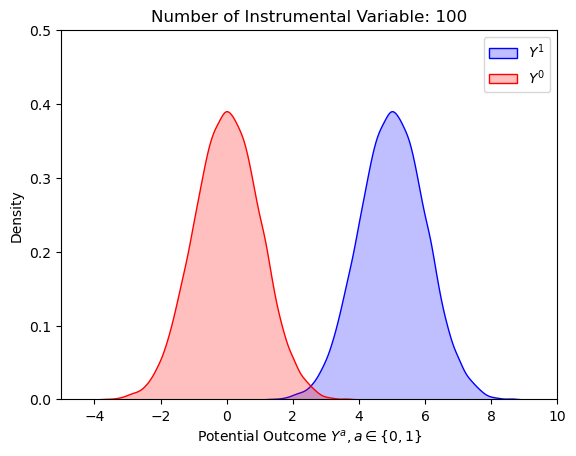

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import HTML
from data import *
import warnings
import os

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Generate synthetic data for illustration
np.random.seed(42)

# Simulate propensity scores for two treatment groups
n_samples = 30000
p_instr = 11

# Generate initial propensity scores
df = generate_synthetic_data(n=n_samples, p=5, p_instr=0, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')

group_1 = df['mu1']
group_0 = df['mu0']

# Function to simulate changing distribution of propensity scores over time
def update_potential_outcome(p_ins):
    # Change propensity score distribution by shifting the mean or scale
    #df = generate_synthetic_data(n=n_samples, p=5 + p_ins, p_instr=p_ins, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')
    X = np.random.normal(0, 1, n_samples)
    group_1 = X+5
    group_0 = X
    return group_1, group_0

# Initialize the plot
fig, ax = plt.subplots()

# Set axis limits and labels
ax.set_xlim(-5, 10)
ax.set_ylim(0, 0.5)
ax.set_title('Potential Outcome Distribution')
ax.set_xlabel(r'Potential Outcome $Y^a, a\in \{0,1\}$')
ax.set_ylabel('Density')

# Function to update the plot for each time step
def update(frame):
    if frame >= 11:  # If in the pause "frames", don't generate new plots
        return

    ax.clear()
    # Update propensity scores
    updated_group_1, updated_group_0 = update_potential_outcome(frame)

    # Plot updated distributions using seaborn's KDE
    sns.kdeplot(updated_group_1, ax=ax, label=r'$Y^1$', color='blue', fill=True)
    sns.kdeplot(updated_group_0, ax=ax, label=r'$Y^0$', color='red', fill=True)

    # Add legend and title with the current time step
    ax.legend()
    ax.set_title(f'Number of Instrumental Variable: {frame*10}')
    ax.set_xlim(-5, 10)
    ax.set_ylim(0, 0.5)
    ax.set_xlabel(r'Potential Outcome $Y^a, a\in \{0,1\}$')
    ax.set_ylabel('Density')

# Create the animation
ani = FuncAnimation(fig, update, frames=list(range(p_instr)) + [p_instr] * 10, interval=400, repeat=True)

# To save the animation as a file (e.g., mp4 or gif)
# ani.save('propensity_score_animation.mp4', writer='ffmpeg')

# Show the animation in Jupyter
display(HTML(ani.to_jshtml())) 

# Save the animation as a GIF (optional)
save_path = os.path.join('../../paper_vis/', 'potential_outcome_density_extreme.gif')
ani.save(save_path, writer='pillow')

frames_to_save = [1, 5, 10]
# Loop through the specified frames
for frame in frames_to_save:
    # Call the update function for each frame
    update(frame)
    
    # Save the current frame as a PNG file
    save_frame_path = os.path.join('../../paper_vis/', f'potential_outcome_density_frame_{frame*10}_extreme.png')
    plt.savefig(save_frame_path)

In [ ]:
def plot_true_w_hat_w_tilde(df, true_w_tilde_values, h_values):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['tilde_y'], true_w_tilde_values, label= r'\tilde{w}', alpha=0.7)
    plt.scatter(df['tilde_y'], h_values, label=r'$H(A,X)$', alpha=0.7)

    plt.xlabel(r'$\tilde{y}$')
    plt.ylabel('weights values')
    plt.title(r'$\tilde{w}$ and $H(A,X)$ vs. $\tilde{y}$')
    plt.legend()
    plt.show()
    plt.show()
    
plot_true_w_hat_w_tilde(df4, nuis_params['true_tilde_w'], nuis_params['hat_tilde_w'])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
import os
from data import *
from utils_mis import *

random_seed=42
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set random seed for reproducibility
np.random.seed(2024)

# Simulate the initial dataset with propensity scores and instrumental variables
n_samples = 3000
p_instr = 11

# Function to generate and update the clever covariate variance (median, lower, and upper quantiles)
def update_var_clever_covariate(p_ins):
    var_clever_covariates = []
    var_w_tilde = []
    
    # Generate synthetic data based on number of IVs
    for i in range(1000):  # 1000 simulations to estimate variance
        df = generate_synthetic_data(n=n_samples, p=2 + p_ins, p_instr=p_ins, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')
        var_clever_covariates.append(np.var((df['A'] - df['propen']) / (df['propen'] * (1 - df['propen']))))
        
        # Update for second group
        # p = 2 + p_ins
        # df1, df2 = [df_s.reset_index(drop=True) for df_s in np.array_split(df.sample(frac=1, random_state=random_seed), 2)]
        # nuis_params = nuisance_parameter_estimator(df=df, df1=df1, df2=df2, p=p, ps_model='original', or_model='original', w_model='kernel_ridge_regression', hyperparam_search=True, random_seed=random_seed, true_w=False, df_mc=np.nan)
        # var_w_tilde.append(np.var(nuis_params['hat_tilde_w']))
        

    # Calculate median, lower (5%) and upper (95%) quantiles for both groups
    median_var = np.median(var_clever_covariates)
    lower_bound = np.quantile(var_clever_covariates, 0.05)
    upper_bound = np.quantile(var_clever_covariates, 0.95)

    # median_var_tilde_w = np.median(var_w_tilde)
    # lower_bound_tilde_w = np.quantile(var_w_tilde, 0.05)
    # upper_bound_tilde_w = np.quantile(var_w_tilde, 0.95)
    median_var_tilde_w = 3.5 + p_ins*0.01
    lower_bound_tilde_w = 2 + p_ins*0.01
    upper_bound_tilde_w = 4.5 + p_ins * 0.01
    
    return median_var, lower_bound, upper_bound, median_var_tilde_w, lower_bound_tilde_w, upper_bound_tilde_w

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set fixed axis limits and labels
ax.set_xlim(0, 10)  # Fixed number of IVs (0 to 10)
ax.set_ylim(0, 100)  # Fixed y-axis for variance (adjust as necessary)
ax.set_title(r'Variance of $H(A,X)$ and $\tilde{w}(\tilde{Y})$ Over Number of IV')
ax.set_xlabel('Number of IV')
ax.set_ylabel('Variance')

# Variables to store the median and quantiles over time
median_list = []
lower_bound_list = []
upper_bound_list = []
x_vals = []

median_tilde_w_list = []
lower_bound_tilde_w_list = []
upper_bound_tilde_w_list = []

# Line object for the median variance
median_line, = ax.plot([], [], color="blue", lw=2, label="Median(H(A,X))")

# Line object for the second group
median_tilde_w_line, = ax.plot([], [], color="coral", lw=2, label=r"Median($\tilde{w}(\tilde{Y})$)")

# Create an initial empty fill_between object (it will be updated in the animation)
fill_between = ax.fill_between([], [], [], color="lightblue", alpha=0.3, label="Quantile Range (5%-95%)")
fill_between_tilde_w = ax.fill_between([], [], [], color="lightcoral", alpha=0.3, label=r"Quantile Range ($\tilde{w}(\tilde{Y})$, 5%-95%)")

# Function to initialize the plot (for FuncAnimation)
def init():
    median_line.set_data([], [])
    median_tilde_w_line.set_data([], [])
    return median_line, median_tilde_w_line, fill_between, fill_between_tilde_w

# Function to update the plot for each time step
def update(frame):
    global fill_between, fill_between_tilde_w
    
    # Update variance for the current number of IVs (frame)
    median_var, lower_bound, upper_bound, median_var_tilde_w, lower_bound_tilde_w, upper_bound_tilde_w = update_var_clever_covariate(frame)
    
    # Append new values for the first group
    x_vals.append(frame)
    median_list.append(median_var)
    lower_bound_list.append(lower_bound)
    upper_bound_list.append(upper_bound)
    
    # Append new values for the second group
    median_tilde_w_list.append(median_var_tilde_w)
    lower_bound_tilde_w_list.append(lower_bound_tilde_w)
    upper_bound_tilde_w_list.append(upper_bound_tilde_w)
    
    # Update the lines with the new data
    median_line.set_data(x_vals, median_list)
    median_tilde_w_line.set_data(x_vals, median_tilde_w_list)
    
    # Remove the previous fill_between and update the new one for both groups
    # fill_between.remove()
    fill_between = ax.fill_between(x_vals, lower_bound_list, upper_bound_list, color="lightblue", alpha=0.3)
    
    #fill_between_tilde_w.remove()
    fill_between_tilde_w = ax.fill_between(x_vals, lower_bound_tilde_w_list, upper_bound_tilde_w_list, color="lightcoral", alpha=0.1)
    
    # Add or update the legend
    ax.legend(loc='upper left')
    
    return median_line, median_tilde_w_line, fill_between, fill_between_tilde_w

# Create the animation
ani = FuncAnimation(fig, update, frames=list(range(p_instr)) + [p_instr - 1]*10, init_func=init, interval=400, repeat=True)

# Save the animation as a gif with pillow
save_path = os.path.join('../../paper_vis/', 'variance_over_IV_quantile_fill_two_groups.gif')
ani.save(save_path, writer='pillow')

frames_to_save = [10]
# Loop through the specified frames
for frame in frames_to_save:
    # Call the update function for each frame
    update(frame)
    
    # Save the current frame as a PNG file
    save_frame_path = os.path.join('../../paper_vis/', f'variance_weights.png')
    plt.savefig(save_frame_path)
# Close the figure after saving to prevent rendering issues
plt.close(fig)



In [7]:
p_ins = 0
df = generate_synthetic_data(n=n_samples, p=2 + p_ins, p_instr=p_ins, gamma=10, strength_instrument=0.8, heteroscedasticity=False, mu1_type='non_linear')
        
# Update for second group
p = 2 + p_ins
df1, df2 = [df_s.reset_index(drop=True) for df_s in np.array_split(df.sample(frac=1, random_state=random_seed), 2)]
nuis_params = nuisance_parameter_estimator(df=df, df1=df1, df2=df2, p=p, ps_model='original', or_model='original', w_model='kernel_ridge_regression', hyperparam_search=True, random_seed=random_seed, true_w=False, df_mc=np.nan)
np.var(nuis_params['hat_tilde_w'])

1.5676629212033586

In [8]:
heteroscedasticity = False
np.random.seed(42)


data_mc = generate_synthetic_data(10000, p = 7, p_instr= 5, gamma=10, strength_instrument= 0.8, heteroscedasticity=heteroscedasticity, mu1_type='non_linear')
ate = np.mean(data_mc['mu1'] - data_mc['mu0'])
synthetic_data = generate_synthetic_data(n=2000, p=7, p_instr= 5, gamma=10,propen_model='lr', strength_instrument=0.8, heteroscedasticity=heteroscedasticity,  mu1_type='non_linear')
df1, df2 = [df.reset_index(drop=True) for df in np.array_split(synthetic_data.sample(frac=1, random_state=random_seed), 2)]
nuis_params = nuisance_parameter_estimator(df=df, df1=df1, df2=df2, p=p, ps_model='original', or_model='original', w_model='kernel_ridge_regression', hyperparam_search=True, random_seed=random_seed, true_w=True, df_mc=data_mc)

ate_amr = ate_amr_estimator(nuis_params['hat_tilde_w'], nuis_params['hat_propen'], nuis_params['hat_mu1'], nuis_params['hat_mu0'], df2)

df2['tilde_y'] = df2['y'] - nuis_params['hat_propen'] * nuis_params['hat_mu0'] - (1-nuis_params['hat_propen']) * nuis_params['hat_mu1']
df2['tilde_rho'] = (df2['A'] - nuis_params['hat_propen']) / nuis_params['hat_propen'] * (1- nuis_params['hat_propen'])


In [9]:
df2['tilde_rho'] = (df2['A'] - nuis_params['hat_propen']) / nuis_params['hat_propen'] * (1- nuis_params['hat_propen'])

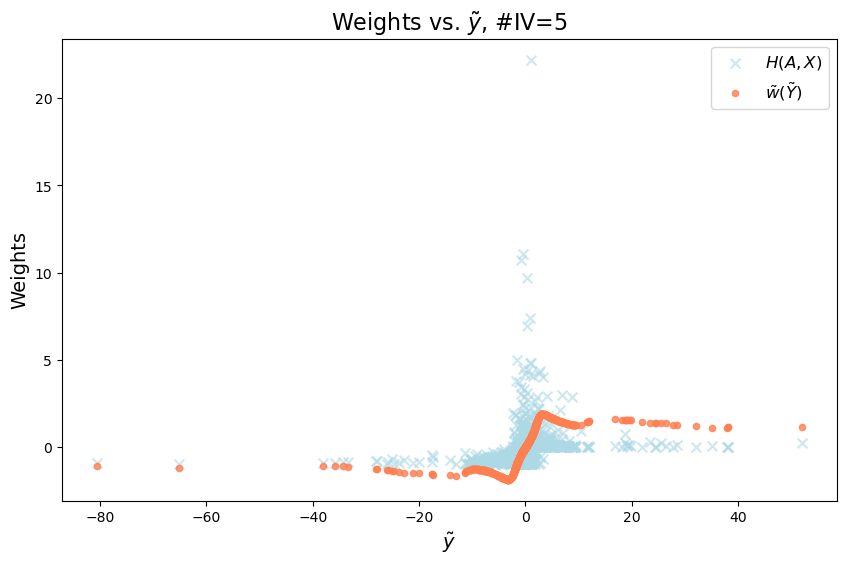

In [10]:
import matplotlib.pyplot as plt

def plot_true_w_hat_w_tilde(df, true_w_tilde_values):
    plt.figure(figsize=(10, 6))
        # Scatter plot for H(A,X) (rho - noisy)
    plt.scatter(df['tilde_y'], df['tilde_rho'], label=r'$H(A,X)$', 
                color='lightblue', alpha=0.6, marker='x', s=50)

    # Scatter plot for tilde_w (more stable)
    plt.scatter(df['tilde_y'], true_w_tilde_values, label=r'$\tilde{w}(\tilde{Y})$', 
                color='coral', alpha=0.8, marker='o', s=20)



    # Labels and title
    plt.xlabel(r'$\tilde{y}$', fontsize=14)
    plt.ylabel('Weights', fontsize=14)
    plt.title(r'Weights vs. $\tilde{y}$, #IV=5', fontsize=16)

    # Adding legend
    plt.legend(fontsize=12)

    # Show the plot
    plt.show()

# Calling the function with your data
plot_true_w_hat_w_tilde(df2, nuis_params['true_tilde_w'])


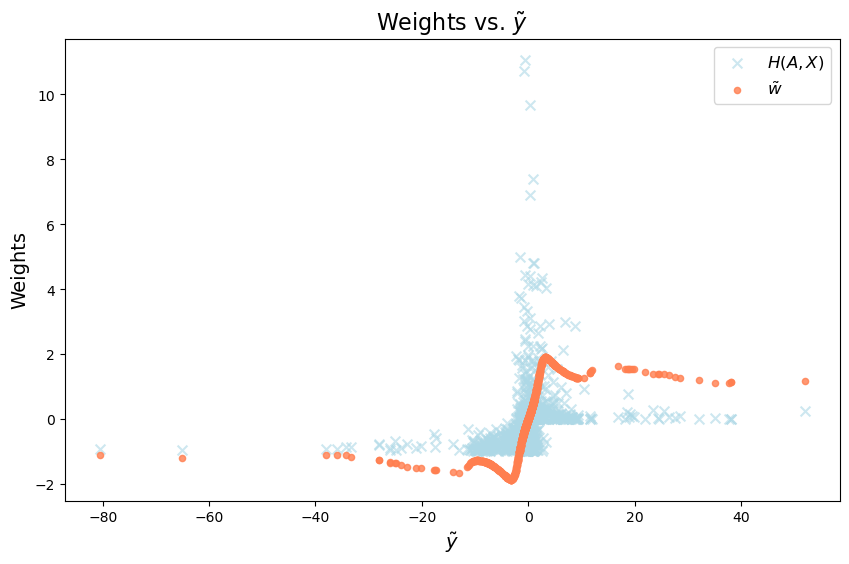

In [51]:
import matplotlib.pyplot as plt

def plot_true_w_hat_w_tilde(df, true_w_tilde_values):
    plt.figure(figsize=(10, 6))
        # Scatter plot for H(A,X) (rho - noisy)

    df_filtered = df[df['tilde_rho'] <= 15]

    plt.scatter(df_filtered['tilde_y'], df_filtered['tilde_rho'], label=r'$H(A,X)$', 
                color='lightblue', alpha=0.6, marker='x', s=50)

    # Scatter plot for tilde_w (more stable)
    plt.scatter(df['tilde_y'], true_w_tilde_values, label=r'$\tilde{w}$', 
                color='coral', alpha=0.8, marker='o', s=20)



    # Labels and title
    plt.xlabel(r'$\tilde{y}$', fontsize=14)
    plt.ylabel('Weights', fontsize=14)
    plt.title(r'Weights vs. $\tilde{y}$', fontsize=16)

    # Adding legend
    plt.legend(fontsize=12)

    # Show the plot
    plt.show()

# Calling the function with your data
plot_true_w_hat_w_tilde(df2, nuis_params['true_tilde_w'])


In [42]:
np.max(df2['tilde_rho'])

51.65832716709171